   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

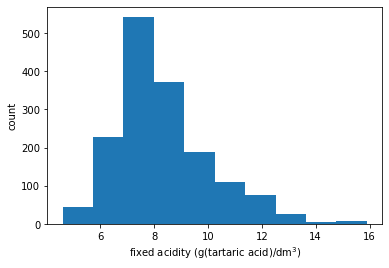

In [7]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep = ';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
fig, ax = plt.subplots()
ax.hist(df['fixed acidity'])
ax.set_xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
ax.set_ylabel('count')
plt.show()

In [6]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


In [9]:
# Data type constraints
# Common data problems

# The assert statement
assert 1 + 1 == 2 # Will return nothing

assert 1+ 1 == 3 # Will return an assertion error


AssertionError: 

In [1]:
import datetime as dt



In [ ]:
# Membership constraints 
# Do not run

inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)

# Get and print rows with inconsistent categories
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)

# Subset the inconsistent rows
study_data[inconsistent_rows]

# To drop inconsistent rows and get consistent data only
consistent_data = study_data[~inconsistent_rows]                              


In [ ]:
# Categorical variables
# Do not run

marriage_status = demographics['marriage_status']
marriage_status.value_counts()

# Get value counts on DataFrame
marrigae_status.groupby('marriage_status').count()

# Value consistency by either capitalizing or lower case
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.upper()
 #or
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.lower()

# To remove leading or trailing spaces

# Strip all spaces
demographics = demographics['marriage_status'].str.strip()

# To collapse data into categories

#1. use qcut
group_names = ['0-200K','200K-500K','500K+']
demographics['income_group']=pd.qcut(demographics['household_income'], q = 3, 
                                    labels = group_names)
print(demographics[['income_group', 'household_income']])

#2. use cut
ranges = [0,200000,500000,np.inf]
group_names = ['0-200K','200K-500K','500K+']
demographics['income_group']=pd.cut(demographics['household_income'], bins = ranges, 
                                    labels = group_names)
print(demographics[['income_group', 'household_income']])

# Reducing categories
#1. Create mapping dictionary and replace
mapping = {'Microsoft':'DesktopOS', 'MacOS':'DesktopOS','Linux':'DesktopOS',
          'IOS':'MobileOS','Android':'MobileOS'}
devices['operating_system']= devices['operating_system'].replace(mapping)
devices['operating_system'].unique()


In [ ]:
# Cleaning text data

# Replacing values
#Do not print

phones['phone number']= phones['phone number'].str.replace('+','00')
phones['phone number']= phones['phone number'].str.replace('-','')

digits = phones['phone number'].str.len()
phones.loc[digits < 10, 'phone number'] = np.nan

In [ ]:
# Data Uniformity

# Treating temperature data
temp_fah = temperatures.loc[temperatures["Temperature"]>40,"Temperature"]
temp_cels = (temp_fah - 32)*(5/9)
temperatures.loc[temperatures['Temperature']> 40, 'Temperature'] = temp_cels

# Assert the conversion is correct
assert temperatures['Temperature'].max()<40

# Treating date data using pandas.to_datetime()
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],
                                       # Attempt to infer format of each date
                                      infer_datetime_format = True,
                                       # Return NA for rows where conversion failed
                                      errors = 'coerce')
# To change the date format
birthdays['Birthday'] = birthdays['Birthday'].dt.strftime('%d-%m-%Y')



In [ ]:
# Cross field validation, when merging data from different sources

# Do not run
sum_classes = flights[['economy_class','business_class','first_class']].sum(axis = 1)
passenger_equ = sum_classes == flights['total_passengers']
# Find and filter out rows with inconsistent passenger totals
inconsistent_pass = flights[~passenger_equ]
consistent_pass = flights[passenger_equ]

# Validating birthdays
# Convert to datetime to get today's date
users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()
# For each row in Birthdate column, calculate the year difference
age_manual = today.year - users['Birthday'].dt.year
# Find instances where the ages match 
age_equ = age_manual == users['Age']
# Find and filter out rows with inconsistent ages
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

In [ ]:
# Completeness of the data, i.e., missing data

# Do not run
# To return missing values
df.isna()
# To get a summary of missingness
df.isna().sum()

import missingno as msno
# To visualize missingness
msno.matrix(df)
plt.show()

# Isolate missing and complete values
missing = df[df['column'].isna()]
complete = df[~df['column'].isna()]

complete.describe()
missing.describe()

sorted_df = df.sort_values(by = 'column')
msno.matrix(sorted_df)
plt.show()

# To drop missing values
df_dropped = df.dropna(subset = ['column'])

# To replace with a statistical measure
col_mean = df['column'].mean()
df_imputed = df.fillna({'column':col_mean})

list = []
dict = {}

In [2]:
# Comparing strings- Record linkage
# Minimum edit distance

from fuzzywuzzy import fuzz
# pip install fuzzywuzzy  RTFM

fuzz.WRatio('Reeding','Reading')

# Define string and array of possible matches
string = "Houston Rocketes vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',
                    'Houston vs Los Angeles', 'Heat vs Bulls'])

process.extract(string, choices, limit = 2)

# For each category create a for loop
for state in categories['state']:
    # Find potential matches in states with typos
    matches = process.extract(state, survey['state'], limit = survey.shape[0])
    # for each potential match, match
    for potential_match in matches:
        # if high similarity score
        if potential_match[1] >= 80:
            # replace typo with correct category
            survey.loc[survey['state'] == potential_match[0], 'state'] = state
            
    
    




ModuleNotFoundError: No module named 'fuzzywuzzy'

In [3]:
# Generating Pairs- Record Linkage

# Import record linkage
import recordlinkage
# pip install recordlinkage

# Creating indexing object
indexer = recordlinkage.Index()

# Generate pairs on the blocked entity
indexer.block('blocking variable')
pairs = indexer.index(record_A, record_B)

# Create a compare object
compare_cl = recordlinkage.Compare()

# To find exact matches for pairs
compare_cl.exact('col1a','col1b', label = 'new common label')
compare_cl.exact('col2a', 'col2b', label = 'new common label')

# To find matches using string similarity
compare_cl.string('col1a','col1b', threshold = 0.85, label = 'new common label')
compare_cl.string('col2a', 'col2b', thrershold = 0.85, label = 'new common label')

# Find the matches
potential_matches = compare_cl.compute(pairs, record_A, record_B)

potential_matches[potential_matches.sum(axis = 1) => 2]

# Linking DataFrames
matches.index

# Get the indices from the desired record
duplicate_rows = matches.index.get_level_values(1)

# Finding duplicates in selected record
selected_record_duplicates = selected_record[selected_record.index.isin(duplicate_rows)]

# Finding new rows in selected record 
selected_record_new = selected_record[~selected_record.index.isin(duplicate_rows)]

# Link the dataframes
full_record = non_selected_record.append(selected_new_record)




ModuleNotFoundError: No module named 'recordlinkage'